<p align="center">
    <img src="https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/076ffad6-abf4-431b-af15-10373ba06182" align="right">
</p>

# **회전기계 진동 데이터 AI 실습**

**제목:** 회전기계의 고장유형 분석을 위한 AI 데이터셋 가이드북  <br>
**Description:** 회전기계로부터 수집한 데이터를 전처리하고, 신경망 학습을 이용하여 회전기계의 정상/고장 여부 및 고장 유형을 판단하고자 함

본 자료는 정부에서 운영하는 아래의 KAMP(한국인공지능제조플랫폼)의 데이터 및 예제를 수정한 교육자료입니다.

중소벤처기업부, Korea AI Manufacturing Platform(KAMP), 회전기계 고장유형 AI 데이터셋, KAIST, 2021.12.27., https://kamp-ai.kr

https://www.kamp-ai.kr/aidataDetail?AI_SEARCH=%ED%9A%8C%EC%A0%84%EA%B8%B0%EA%B3%84&page=1&DATASET_SEQ=18&EQUIP_SEL=&GUBUN_SEL=&FILE_TYPE_SEL=&WDATE_SEL=

※ 분석하기에 앞서 다음과 같은 가상환경이 구축되어있는지 확인해주세요. <br>
Python 버전 : 3.10.12

In [1]:
!python --version

Python 3.10.12


## 1. 분석 개요

### 1.1 분석 배경

**공정(설비) 개요:**
- 회전기계는 발전소, 공장 등의 다양한 산업 현장에서 터빈, 펌프, 전동기, 압축기, 송풍기 등으로 사용됩니다. 
- 이들 기계는 동력원을 통해 회전축 주위를 회전하는 기계로, 주요 설비로 사용됩니다.

![Rotor_1](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/f996a9a1-a32f-4b2f-8ba3-a3f2769b9685)
<center>[회전기계 설비(사진)]</center> <br>

**이슈사항(Pain Point):**
- 회전기계가 예상치 못한 고장으로 인해 가동이 중단되면 유지보수 비용뿐만 아니라 시스템 가동 중지로 인한 비계획적 손실이 발생합니다.
### 1.2 분석 목표

**분석 목표:**
- 회전기계의 진동 데이터를 분석하여 기계의 정상 상태와 비정상 상태를 분류하고, 비정상 상태의 유형 판별을 딥러닝 알고리즘을 활용하여 해결하고자합니다.

**제조 데이터 분석 기대효과:**
- 데이터 분석을 통해 회전기계의 운영 조건에 따른 기계 상태를 예측하고, 고장 발생을 미리 파악하여 유지보수 계획을 최적화할 수 있습니다.

### 1.3 제조데이터 소개

**데이터 수집 방법:**
- 제조 분야: 회전기계가 사용되는 모든 산업 분야
- 제조 공정명: 회전기계시스템 및 그 운영 데이터
- 수집장비: 진동 센서
- 수집기간: 2020년 3월 4일 ~ 2020년 4월 30일 (약 2개월)
- 수집주기: 약 140초의 가속도(진동) 신호 수집

![Rotor_6](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/9da136c0-ef10-4448-91d5-7af5f7609c4f)

**데이터 유형/구조:**<br>
![Rotor_2](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/0b02204d-6efb-44c8-be29-ce9af6d9a16f)
 - 데이터 크기, 데이터 수량: 약 1,500,000개의 관측치
 - 데이터 속성 정의 표:<br>
![Rotor_3](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/456b46c2-fbca-4e73-956a-5ae39e6198dc)
![Rotor_4](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/62d7d1a4-6457-44bf-8162-1ca6bf9d852e)
 - 독립변수/종속변수 정의:<br>
![Rotor_5](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/8902dc27-db43-4c22-99ae-bbe722025bf6)

## 2. 분석 실습


### 2-1. 라이브러리 / 데이터 불러오기

#### 필요한 라이브러리 설치 및 불러오기

In [2]:
!pip install --upgrade pip

In [3]:
!pip install tensorflow==2.16.1 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.0 scikit-learn==1.5.0 imbalanced-learn==0.9.0

In [4]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#### 데이터 불러오기

In [5]:
# group1 데이터 로드
sensor1 = pd.read_csv('./dataset/g1_sensor1.csv', names=['time', 'normal', 'type1', 'type2', 'type3'])
sensor2 = pd.read_csv('./dataset/g1_sensor2.csv', names=['time', 'normal', 'type1', 'type2', 'type3'])
sensor3 = pd.read_csv('./dataset/g1_sensor3.csv', names=['time', 'normal', 'type1', 'type2', 'type3'])
sensor4 = pd.read_csv('./dataset/g1_sensor4.csv', names=['time', 'normal', 'type1', 'type2', 'type3'])

### 2-2. 데이터 특성 파악


#### 데이터 기본 구조 파악

In [6]:
sensor1.head()

,time,normal,type1,type2,type3
0,0.000000,-0.853307,-3.464579,0.555219,3.919664
1,0.000736,-0.740463,-2.448986,-0.234687,4.145351
2,0.001472,-0.138630,-1.922383,-0.009000,2.941685
3,0.002208,0.049443,-0.906790,-0.272301,2.603155
4,0.002944,-0.289088,-0.568259,-0.986978,1.361874


In [7]:
sensor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190218 entries, 0 to 190217
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    190218 non-null  float64
 1   normal  190218 non-null  float64
 2   type1   190218 non-null  float64
 3   type2   190218 non-null  float64
 4   type3   190218 non-null  float64
dtypes: float64(5)
memory usage: 7.3 MB


In [8]:
print(sensor1.describe())

                time         normal          type1          type2  \
count  190218.000000  190218.000000  190218.000000  190218.000000   
mean       69.999856      -0.000037      -0.000087       0.000036   
std        40.414754       0.708399       1.700166       0.724812   
min         0.000000      -2.251143      -6.699430      -2.366852   
25%        34.999928      -0.595441      -1.525924      -0.560912   
50%        69.999856       0.080996      -0.024703      -0.030856   
75%       104.999784       0.578801       1.540837       0.572961   
max       139.999712       2.037394       6.616120       2.311678   

               type3  
count  190218.000000  
mean       -0.000067  
std         1.870773  
min        -6.941574  
25%        -1.664113  
50%         0.392694  
75%         1.567799  
max         7.540028  


In [9]:
print('sensor 1의 데이터 크기', sensor1.shape)
print('sensor 2의 데이터 크기', sensor2.shape)
print('sensor 3의 데이터 크기', sensor3.shape)
print('sensor 4의 데이터 크기', sensor4.shape)

sensor 1의 데이터 크기 (190218, 5)
sensor 2의 데이터 크기 (184211, 5)
sensor 3의 데이터 크기 (196079, 5)
sensor 4의 데이터 크기 (183969, 5)


### 2-3. 데이터 정제(전처리)


#### 데이터 선형보간
각 센서별 sampling rate은 다음과 같다. <br>

| Sensor 1 | Sensor 2 | Sensor 3 | Sensor 4 |
|:--------:|:--------:|----------|----------|
| 0.000736 | 0.000760 | 0.000714 | 0.000761 |

계측된 센서 데이터의 계측 시간 간격 (sampling rate)이 일정하지 않은 경우, 데이터 간 정확한 비교가 어려우므로 계측 시간의 동일화를 위해 전처리(선형 보간)가 요구된다. 선형보간의 방법은 아래 그림과 같다.
<br>
![interpolation.png](https://raw.githubusercontent.com/jjyjung/ai/gh-pages/img/interpolation.png)<br>
<br>
따라서 표에 나온 sampling rate을 이용하여 각 센서의 데이터를 0.001 sec 간격으로 선형보간 한다 (총 140초). <br>
 - interpolate.interp1d() : [선형보간 함수](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)를 이용하였다.

In [10]:
from scipy import interpolate

x_new = np.arange(0, 140, 0.001)

y_new1 = []; y_new2 = []; y_new3 = []; y_new4 = []
for item in ['normal', 'type1', 'type2', 'type3']:
    f_linear1 = interpolate.interp1d(sensor1['time'], sensor1[item], kind='linear'); y_new1.append(f_linear1(x_new))
    f_linear2 = interpolate.interp1d(sensor2['time'], sensor2[item], kind='linear'); y_new2.append(f_linear2(x_new))
    f_linear3 = interpolate.interp1d(sensor3['time'], sensor3[item], kind='linear'); y_new3.append(f_linear3(x_new))
    f_linear4 = interpolate.interp1d(sensor4['time'], sensor4[item], kind='linear'); y_new4.append(f_linear4(x_new))

sensor1 = pd.DataFrame(np.array(y_new1).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor2 = pd.DataFrame(np.array(y_new2).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor3 = pd.DataFrame(np.array(y_new3).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor4 = pd.DataFrame(np.array(y_new4).T, columns = ['normal', 'type1', 'type2', 'type3'])

In [11]:
sensor1

,normal,type1,type2,type3
0,-0.853307,-3.464579,0.555219,3.919664
1,-0.524588,-2.260096,-0.153734,3.713601
2,-0.003708,-1.193805,-0.197890,2.698827
3,-0.297674,-0.490986,-0.972668,1.338978
4,-0.091203,0.790771,-0.913384,0.701167
...,...,...,...,...
139995,-1.057411,-1.389236,0.664186,-1.498190
139996,-0.513635,-1.368793,1.050553,-0.982626
139997,-1.085213,-2.281763,0.868204,-2.144997
139998,-0.677177,-1.887220,0.792975,-2.146224


선형 보간 작업을 위해 데이터를 센서별로 묶어두었지만, 실제 취득된 형태로 데이터를 다시 조정합니다

In [12]:
normal_ = pd.concat([sensor1['normal'],sensor2['normal'],sensor3['normal'],sensor4['normal']],axis=1)
type1_  = pd.concat([sensor1['type1'], sensor2['type1'], sensor3['type1'], sensor4['type1']], axis=1)
type2_  = pd.concat([sensor1['type2'], sensor2['type2'], sensor3['type2'], sensor4['type2']], axis=1)
type3_  = pd.concat([sensor1['type3'], sensor2['type3'], sensor3['type3'], sensor4['type3']], axis=1)

normal_.columns = ['s1', 's2', 's3', 's4']; type1_.columns = ['s1', 's2', 's3', 's4']
type2_.columns  = ['s1', 's2', 's3', 's4']; type3_.columns = ['s1', 's2', 's3', 's4']

In [13]:
normal_

,s1,s2,s3,s4
0,-0.853307,0.048823,-0.437626,-1.116226
1,-0.524588,-0.029477,-0.149817,-0.659694
2,-0.003708,-0.004751,0.280889,-0.857345
3,-0.297674,0.009673,-0.303281,-0.685318
4,-0.091203,0.096215,-0.320263,-0.303108
...,...,...,...,...
139995,-1.057411,0.587429,0.275044,0.289837
139996,-0.513635,-0.137874,-0.045973,0.131462
139997,-1.085213,0.002242,-0.164593,-0.087380
139998,-0.677177,-0.308897,0.288252,1.319862


In [14]:
print('normal 상태 데이터의 사이즈', normal_.shape)
print('type1  상태 데이터의 사이즈', type1_.shape)
print('type2  상태 데이터의 사이즈', type2_.shape)
print('type3  상태 데이터의 사이즈', type3_.shape)

normal 상태 데이터의 사이즈 (140000, 4)
type1  상태 데이터의 사이즈 (140000, 4)
type2  상태 데이터의 사이즈 (140000, 4)
type3  상태 데이터의 사이즈 (140000, 4)


#### 데이터 필터링 (Filtering)

센서로부터 취득한 데이터는 기본적으로 기계학습에 좋지 않은 영향을 주는 노이즈(Noise)가 포함되어 있다. 센서 데이터에 평균을 취하면 데이터의 노이즈를 제거할 수 있는데, 측정하려는 물리량이 시간에따라 변하는 경우에는 적절하지 않다(데이터의 동적인 변화를 모두 smoothing하는 결과). 따라서 데이터에서 노이즈를 제거하면서, 동적인 변화를 반영하는 방법으로 이동평균필터가 있으며, 본 가이드북에서는 데이터의 노이즈를 처리하기 위해 이동평균필터(Moving Average filter)를 사용하였다.

- 이동평균필터 (Moving Average filter)는 python에서 [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) 함수로 구현된다 (MATLAB의 filter 함수와 동일). <br>
    - np.convolve() : 1차원 신호를 입력으로 받아, 최근 M개의 측정값들의 평균을 구한다.
    
    - 모든 데이터의 평균이 아니라, 정해진 크기(M개)의 최근 측정값들로만 평균을 구한다. <br>
    - 일반적으로 신호 데이터의 변동이 빠른 경우에는 M값을 작게하고, 신호 데이터의 변동이 느린 경우에는 M값을 크게한다. <br>
    - 자세한 이론은 [자료](https://www.analog.com/media/en/technical-documentation/dsp-book/dsp_book_Ch15.pdf)를 참고하면 좋다.

In [15]:
M = 15

normal_s1 = np.convolve(normal_['s1'], np.ones(M), 'valid') / M; normal_s1 = normal_s1.reshape(len(normal_s1),1)
normal_s2 = np.convolve(normal_['s2'], np.ones(M), 'valid') / M; normal_s2 = normal_s2.reshape(len(normal_s2),1)
normal_s3 = np.convolve(normal_['s3'], np.ones(M), 'valid') / M; normal_s3 = normal_s3.reshape(len(normal_s3),1)
normal_s4 = np.convolve(normal_['s4'], np.ones(M), 'valid') / M; normal_s4 = normal_s4.reshape(len(normal_s4),1)

type1_s1 = np.convolve(type1_['s1'], np.ones(M), 'valid') / M; type1_s1 = type1_s1.reshape(len(type1_s1),1)
type1_s2 = np.convolve(type1_['s2'], np.ones(M), 'valid') / M; type1_s2 = type1_s2.reshape(len(type1_s2),1)
type1_s3 = np.convolve(type1_['s3'], np.ones(M), 'valid') / M; type1_s3 = type1_s3.reshape(len(type1_s3),1)
type1_s4 = np.convolve(type1_['s4'], np.ones(M), 'valid') / M; type1_s4 = type1_s4.reshape(len(type1_s4),1)

type2_s1 = np.convolve(type2_['s1'], np.ones(M), 'valid') / M; type2_s1 = type2_s1.reshape(len(type2_s1),1)
type2_s2 = np.convolve(type2_['s2'], np.ones(M), 'valid') / M; type2_s2 = type2_s2.reshape(len(type2_s2),1)
type2_s3 = np.convolve(type2_['s3'], np.ones(M), 'valid') / M; type2_s3 = type2_s3.reshape(len(type2_s3),1)
type2_s4 = np.convolve(type2_['s4'], np.ones(M), 'valid') / M; type2_s4 = type2_s4.reshape(len(type2_s4),1)

type3_s1 = np.convolve(type3_['s1'], np.ones(M), 'valid') / M; type3_s1 = type3_s1.reshape(len(type3_s1),1)
type3_s2 = np.convolve(type3_['s2'], np.ones(M), 'valid') / M; type3_s2 = type3_s2.reshape(len(type3_s2),1)
type3_s3 = np.convolve(type3_['s3'], np.ones(M), 'valid') / M; type3_s3 = type3_s3.reshape(len(type3_s3),1)
type3_s4 = np.convolve(type3_['s4'], np.ones(M), 'valid') / M; type3_s4 = type3_s4.reshape(len(type3_s4),1)

In [16]:
normal_temp = np.concatenate((normal_s1,normal_s2,normal_s3,normal_s4), axis = 1)
type1_temp = np.concatenate((type1_s1,type1_s2,type1_s3,type1_s4), axis = 1)
type2_temp = np.concatenate((type2_s1,type2_s2,type2_s3,type2_s4), axis = 1)
type3_temp = np.concatenate((type3_s1,type3_s2,type3_s3,type3_s4), axis = 1)

#### 데이터 정규화

데이터 (140000,4)의 센서 값들이 다양한 Range를 갖는다. <br>
이는 신경망 학습에 그대로 이용하기엔 적절하지 않다. <br>
일반적으로 인풋 값들을 정규화(Normalization)하는데, 본 가이드북에서는 Min-max normalization 활용하여 진행하였다. <br>
Min-max normalization는 데이터를 0과 1 사이의 값으로 scaling한다.

1) Normal data의 최대값(max)과 최소값(min)을 구한다. <br>
2) 정규화할 데이터 값(x)과 앞서 구한 최대값(Xmax), 최소값(Xmin)을 다음의 식에 대입한다.

![sensor1.png](https://raw.githubusercontent.com/jjyjung/ai/gh-pages/img/minmax.png)<br>
3) 이와 같은 식은 sklearn.preprocessing의 MinMaxScaler에 구현되어있다.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(normal_)
normal = scaler.transform(normal_temp)
type1  = scaler.transform(type1_temp)
type2  = scaler.transform(type2_temp)
type3  = scaler.transform(type3_temp)

C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# 데이터 사이즈 조정
이동평균 필터링 후에 데이터의 사이즈를 조정한다 <br>
데이터 사이즈를 (10000, 4)로 맞춰주었다.(딥러닝 학습 시간 고려)

In [18]:
# normal = normal[100000:125000][:]
# type1  = type1[100000:125000][:]
# type2  = type2[100000:125000][:]
# type3  = type3[100000:125000][:]

normal = normal[100000:110000][:]
type1  = type1[100000:110000][:]
type2  = type2[100000:110000][:]
type3  = type3[100000:110000][:]

In [19]:
print(normal)
print('------------------------------------------------')
print('normal data size = ', normal.shape)

[[0.64328714 0.55881164 0.58473478 0.50628721]
 [0.66064775 0.56581905 0.57048603 0.52476451]
 [0.67430631 0.5707941  0.5702254  0.5442626 ]
 ...
 [0.68456922 0.41732953 0.60915979 0.47505373]
 [0.69207456 0.4057493  0.6115001  0.47268531]
 [0.69536447 0.41728719 0.62070549 0.47517462]]
------------------------------------------------
normal data size =  (10000, 4)


#### 데이터 라벨링 및 유형별 분배
Normal, type1-3 abnormal data를 라벨링하고, 1:1:1:1의 비율로 각각 training data, validation data, test data로 나눈다. <br>
이 때, 학습 : 검증 : 테스트 = 6 : 2 : 2 이다.

In [20]:
# 데이터 라벨링 및 분배
def label_and_split_data(data, label, split_indices):
    y = np.full(len(data), label)
    return data[:split_indices[0]], data[split_indices[0]:split_indices[1]], data[split_indices[1]:], \
           y[:split_indices[0]], y[split_indices[0]:split_indices[1]], y[split_indices[1]:]

# split_indices = [15000, 20000]
split_indices = [6000, 8000]
normal_train, normal_val, normal_test, normal_y_train, normal_y_val, normal_y_test = label_and_split_data(normal, 0, split_indices)
type1_train, type1_val, type1_test, type1_y_train, type1_y_val, type1_y_test = label_and_split_data(type1, 1, split_indices)
type2_train, type2_val, type2_test, type2_y_train, type2_y_val, type2_y_test = label_and_split_data(type2, 2, split_indices)
type3_train, type3_val, type3_test, type3_y_train, type3_y_val, type3_y_test = label_and_split_data(type3, 3, split_indices)

#### Window 정의 함수 생성
Window는 딥러닝을 학습하기 위한 단위로, window size는 timestep과 같다고 생각하면 된다. <br>
입력한 timestep만큼의 데이터를 저장하여 과거 값(예를들어, 1~10)을 통해 현재 종속변수를 예측하는 것이다.



In [21]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps - 1])
    return np.array(Xs), np.array(ys)
    
def generate_datasets(train, val, test, y_train, y_val, y_test, time_steps):
    X_train, y_train = create_dataset(train, y_train, time_steps)
    X_val, y_val = create_dataset(val, y_val, time_steps)
    X_test, y_test = create_dataset(test, y_test, time_steps)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [22]:
TIME_STEPS = 500  # 0.5초 단위

X_normal_train, y_normal_train, X_normal_val, y_normal_val, X_normal_test, y_normal_test = generate_datasets(normal_train, normal_val, normal_test, normal_y_train, normal_y_val, normal_y_test, TIME_STEPS)
X_type1_train, y_type1_train, X_type1_val, y_type1_val, X_type1_test, y_type1_test = generate_datasets(type1_train, type1_val, type1_test, type1_y_train, type1_y_val, type1_y_test, TIME_STEPS)
X_type2_train, y_type2_train, X_type2_val, y_type2_val, X_type2_test, y_type2_test = generate_datasets(type2_train, type2_val, type2_test, type2_y_train, type2_y_val, type2_y_test, TIME_STEPS)
X_type3_train, y_type3_train, X_type3_val, y_type3_val, X_type3_test, y_type3_test = generate_datasets(type3_train, type3_val, type3_test, type3_y_train, type3_y_val, type3_y_test, TIME_STEPS)

#### 데이터 병합 및 셔플

In [23]:
def concatenate_datasets(X_sets, y_sets):
    X = np.concatenate(X_sets, axis=0)
    y = np.concatenate(y_sets, axis=0)
    return X, y

In [24]:
X_train, y_train = concatenate_datasets([X_normal_train, X_type1_train, X_type2_train, X_type3_train], [y_normal_train, y_type1_train, y_type2_train, y_type3_train])
X_val, y_val = concatenate_datasets([X_normal_val, X_type1_val, X_type2_val, X_type3_val], [y_normal_val, y_type1_val, y_type2_val, y_type3_val])
X_test, y_test = concatenate_datasets([X_normal_test, X_type1_test, X_type2_test, X_type3_test], [y_normal_test, y_type1_test, y_type2_test, y_type3_test])

In [25]:
def shuffle_data(X, y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices]

X_train, y_train = shuffle_data(X_train, y_train)
X_val, y_val = shuffle_data(X_val, y_val)
X_test, y_test = shuffle_data(X_test, y_test)

In [26]:
print("train data의 형태:", X_train.shape)
print("valid data의 형태:", X_val.shape)
print(" test data의 형태:", X_test.shape)

train data의 형태: (22000, 500, 4)
valid data의 형태: (6000, 500, 4)
 test data의 형태: (6000, 500, 4)


### 2-4. DNN 모델링


**심층 신경망(DNN)**
- 심층 신경망(Deep Neural Network)은 여러 층의 노드로 구성된 신경망 구조를 쌓아 학습시키는 AI 알고리즘입니다.

    |<b>DNN의 기본구조</b> |
    | :--: |
    | ![](https://parallelr.com/uploads/2016/02/dnn_architecture.png)|
    | (출처:https://parallelr.com/2016/02/13/r-deep-neural-network-from-scratch/)|

  
- 각 노드는 입력 데이터를 받아 연산 후 결과를 출력하며, 활성화 함수(예: 시그모이드, ReLU)를 통해 비선형 변환을 수행합니다.

    |<b>활성화 함수 예: ReLU, sigmoid</b> |
    | :--: |
    | ![CNC_5](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/19863edd-d7a5-4d73-8462-cd238e520c82)|


### DNN 모델 구축

In [27]:
print("train data의 형태:", X_train.shape)

train data의 형태: (22000, 500, 4)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
# AI 모델 파라미터 설정
batch_size = 5000
epochs = 20

# AI 모델 디자인
model = Sequential()
model.add(Flatten(input_shape=(TIME_STEPS, X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         128,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,484 (517.52 KB)

 Trainable params: 132,484 (517.52 KB)

 Non-trainable params: 0 (0.00 B)

#### 모델 학습

In [29]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.2106 - loss: 1.7575 - val_accuracy: 0.2500 - val_loss: 1.4416
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2528 - loss: 1.4509 - val_accuracy: 0.2952 - val_loss: 1.4066
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2761 - loss: 1.4161 - val_accuracy: 0.2458 - val_loss: 1.3882
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2829 - loss: 1.3950 - val_accuracy: 0.2403 - val_loss: 1.3771
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2474 - loss: 1.3817 - val_accuracy: 0.3583 - val_loss: 1.3736
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3234 - loss: 1.3752 - val_accuracy: 0.3685 - val_loss: 1.3670
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3360 - loss: 1.3676 - val_accuracy: 0.3573 - val_loss: 1.3623
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3548 - loss: 1.3615 - val_accuracy: 0.2818 - val_loss: 1.3554


#### 손실 그래프 시각화

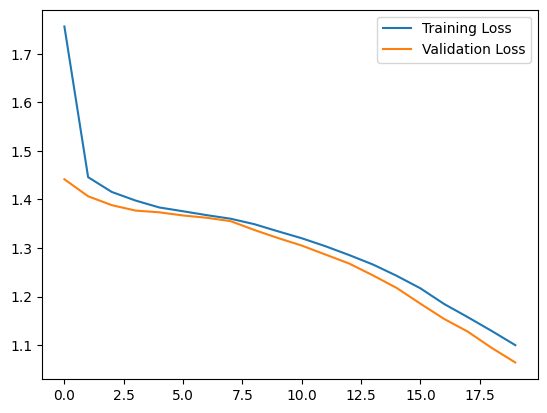

In [30]:
# 손실 그래프 시각화
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### 모델 평가


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
              precision    recall  f1-score   support

           0       0.46      0.57      0.51      1500
           1       0.62      0.42      0.50      1500
           2       0.33      0.40      0.36      1500
           3       0.62      0.55      0.58      1500

    accuracy                           0.48      6000
   macro avg       0.51      0.48      0.49      6000
weighted avg       0.51      0.48      0.49      6000

[[851   0 649   0]
 [ 73 627 300 500]
 [899   0 601   0]
 [ 36 389 252 823]]


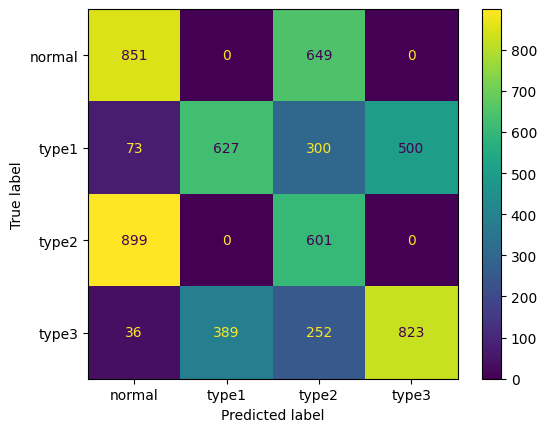

In [31]:
# 예측값 계산
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# 성능 평가
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_class), display_labels=['normal', 'type1', 'type2', 'type3'])
disp.plot()
plt.show()

In [32]:
# F1 Score 및 Accuracy 계산
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

DNN_accuracy = accuracy

Accuracy: 0.4837
F1 Score: 0.4880


### 2-5. CNN 모델링


**CNN**
- 합성곱 신경망(Convolutional Neural Network, CNN)은 이미지 처리에 주로 사용되는 딥러닝 모델로, 이미지의 패턴과 특징을 자동으로 추출하여 분류 및 인식을 수행합니다.
- CNN은 이미지 분류, 객체 인식, 얼굴 인식 등 다양한 컴퓨터 비전 작업에서 뛰어난 성능을 보입니다.<br>
- CNN의 주요 구성 요소
  1. 합성곱 층 (Convolutional Layer): 입력 이미지에 여러 개의 필터를 적용하여 특징 맵을 생성합니다.
  2. 풀링 층 (Pooling Layer): 특징 맵의 크기를 줄여 계산량을 감소시키고, 중요한 특징을 추출합니다.
  3. 완전 연결 층 (Fully Connected Layer): 추출된 특징을 기반으로 최종 출력을 생성합니다.<br>

    |<b>CNN의 기본 구조</b> |
    | :--: |
    | ![](https://media.licdn.com/dms/image/D5612AQGOui8XZUZJSA/article-cover_image-shrink_600_2000/0/1680532048475?e=1722470400&v=beta&t=0wvlOsASQ4GVANk_DcYNZC4XEeHV4X9hf0JhtCpEiNQ)|
    |출처: https://www.linkedin.com/pulse/what-convolutional-neural-network-cnn-deep-learning-nafiz-shahriar/|

**1-D CNN**
- 1-D CNN (1차원 합성곱 신경망)은 시계열 데이터, 신호 처리, 텍스트 데이터 등 1차원 데이터를 처리하는 데 적합한 모델입니다.
- 2차원 이미지를 처리하는 일반적인 CNN과 달리, 1-D CNN은 1차원 데이터의 패턴을 학습하고 특징을 추출합니다.
 
    |<b>1-D CNN의 기본 구조</b> |
    | :--: |
    | ![](https://miro.medium.com/v2/resize:fit:1400/1*iJyzEak-RGfpcBC9v-8oAg.png)|
    |출처: https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fhow-to-use-convolutional-neural-networks-for-time-series-classification-56b1b0a07a57&psig=AOvVaw1HHYhpGxsMj5Gws5uQbKr9&ust=1717153551480000&source=images&cd=vfe&opi=89978449&ved=0CBQQjhxqFwoTCPDSvq2etYYDFQAAAAAdAAAAABAE|

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Flatten, Dense, Dropout

# 1D-CNN 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(TIME_STEPS, X_train.shape[2])))
model.add(GlobalMaxPooling1D())
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 모델 학습

In [34]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 837ms/step - accuracy: 0.2499 - loss: 1.4019 - val_accuracy: 0.4980 - val_loss: 1.3731
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 800ms/step - accuracy: 0.3194 - loss: 1.3701 - val_accuracy: 0.2500 - val_loss: 1.3537
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 799ms/step - accuracy: 0.2514 - loss: 1.3526 - val_accuracy: 0.2500 - val_loss: 1.3356
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 792ms/step - accuracy: 0.2493 - loss: 1.3351 - val_accuracy: 0.2500 - val_loss: 1.3145
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 786ms/step - accuracy: 0.2518 - loss: 1.3137 - val_accuracy: 0.2620 - val_loss: 1.2898
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 802ms/step - accuracy: 0.3958 - loss: 1.2909 - val_accuracy: 0.4740 - val_loss: 1.2637
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 785ms/step - accuracy: 0.5387 - loss: 1.2637 - val_accuracy: 0.4155 - val_loss: 1.2320
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 817ms/step - accuracy: 0.4889 - loss: 1.2333 - val_accuracy: 0.5000 - val_loss:

#### 손실 그래프 시각화

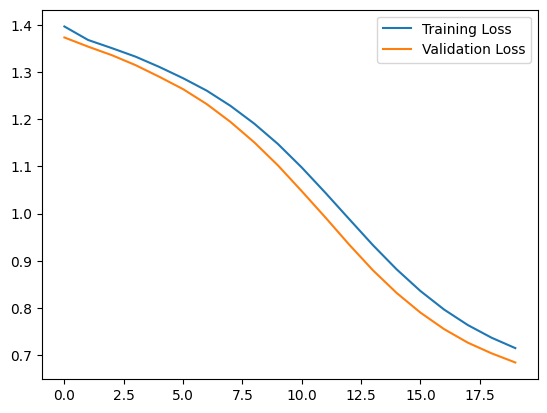

In [35]:
# 손실 그래프 시각화
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### 모델 평가


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1500
           1       1.00      0.68      0.81      1500
           2       0.50      1.00      0.67      1500
           3       0.76      1.00      0.86      1500

    accuracy                           0.67      6000
   macro avg       0.56      0.67      0.58      6000
weighted avg       0.56      0.67      0.58      6000

[[   0    0 1500    0]
 [   0 1018    0  482]
 [   0    0 1500    0]
 [   0    0    0 1500]]


C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

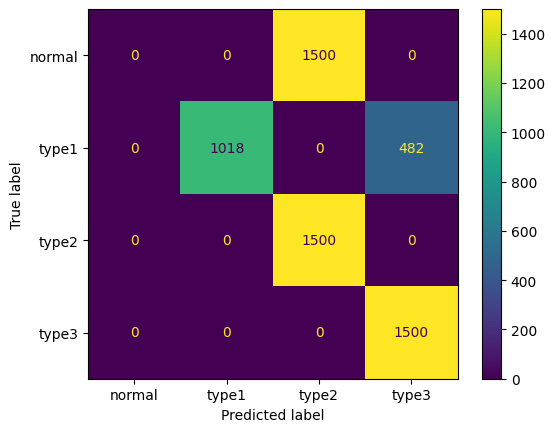

In [36]:
# 예측값 계산
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# 성능 평가
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_class), display_labels=['normal', 'type1', 'type2', 'type3'])
disp.plot()
plt.show()

In [37]:
# F1 Score 및 Accuracy 계산
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

CNN_accuray = accuracy

Accuracy: 0.6697
F1 Score: 0.5842


### 2-6. RNN 모델링


**LSTM**
- LSTM은 RNN(Recurrent Neural Network, 이하 RNN)의 장기의존성 문제를 극복하기 위하여 고안된 특별한 종류의 RNN으로, 이는 일반 RNN 알고리즘에 비해 아주 뛰어나고 다양한 분야에서 활용이 가능합니다.
- RNN은 순환 구조를 이루어 음성, 문자 등 순차적으로 등장하는 데이터(Sequential data)처리에 적합한 딥러닝 모델으로 여러 가지 형태로 활용됩니다.<br>

    |<b>RNN의 여러 가지 활용 형태</b> |
    | :--: |
    | ![](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/ed07e978-d365-4b4c-9734-8fa8e2e6f014)|

    |<b>RNN의 기본 구조</b> |
    | :--: |
    | ![](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/8d7436fb-7bd0-48fb-93d3-1cd9525b4262)|
  
- RNN에는 앞서 언급하였던 장기 의존성(Long-Term Dependency) 문제가 존재하는데, 이는 관련 정보와 그 정보를 사용하는 거리가 멀 경우 두 정보의 연결이 어려워집니다.
  
    |<b>RNN의 장기 의존성 문제</b> |
    | :--: |
    | ![](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/78b74247-1b6b-4090-86ec-9693a2035524)|

- LSTM은 RNN의 은닉층(hidden state)에 셀 스테이트(cell-state)를 추가한 구조입니다.

    |<b>RNN과 LSTM의 기본구조</b> |
    | :--: |
    | ![](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/dc4da1bd-6ea7-40a1-9bec-8e5aef0cb20b)|
  
- LSTM은 4단계로 학습을 진행합니다.<br>
  ① 셀 스테이트에서 어떤 정보를 버릴지 선택<br>
  ② 새로운 정보가 셀 스테이트에 저장될지를 결정<br>
  ③ 셀 스테이트 업데이트<br>
  ④ 출력 값 결정<br>

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

batch_size = 1000
epochs = 20

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(TIME_STEPS, X_train.shape[2])))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 847ms/step - accuracy: 0.2626 - loss: 1.3875 - val_accuracy: 0.2760 - val_loss: 1.3831
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 829ms/step - accuracy: 0.3188 - loss: 1.3758 - val_accuracy: 0.2500 - val_loss: 1.4250
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 852ms/step - accuracy: 0.3200 - loss: 1.3614 - val_accuracy: 0.5588 - val_loss: 1.2676
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 874ms/step - accuracy: 0.4007 - loss: 1.2258 - val_accuracy: 0.2500 - val_loss: 1.3659
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 871ms/step - accuracy: 0.2494 - loss: 1.3986 - val_accuracy: 0.2560 - val_loss: 1.2852
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 886ms/step - accuracy: 0.3858 - loss: 1.2784 - val_accuracy: 0.5110 - val_loss: 1.2183
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 897ms/step - accuracy: 0.5069 - loss: 1.1842 - val_accuracy: 0.5000 - val_loss: 0.8977
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 889ms/step - accuracy: 0.4933 - loss: 0.8369 - val_accu

#### 손실 그래프 시각화

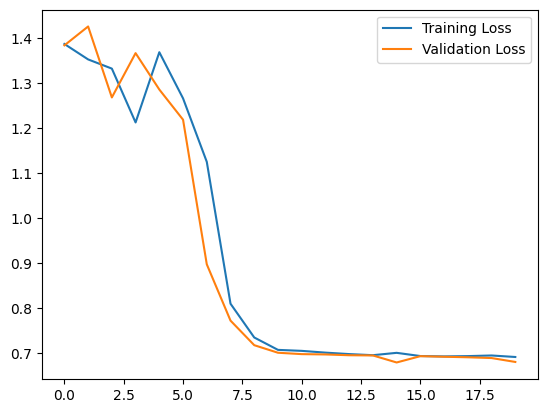

In [46]:
# 손실 그래프 시각화
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### 모델 평가


188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1500
           1       0.75      0.90      0.82      1500
           2       0.56      0.50      0.53      1500
           3       0.88      0.70      0.78      1500

    accuracy                           0.68      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.68      0.68      0.68      6000

[[ 915    0  585    0]
 [   3 1344   12  141]
 [ 749    0  751    0]
 [   0  444    0 1056]]


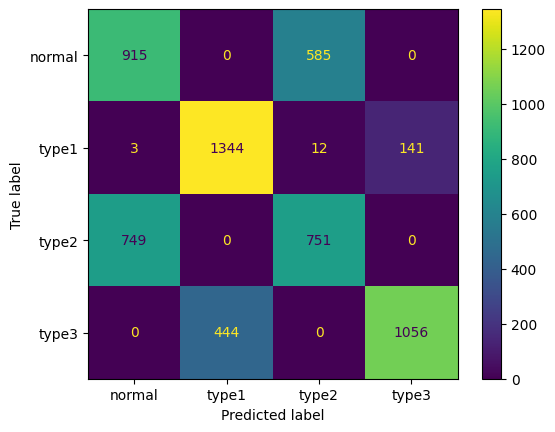

In [47]:
# 예측값 계산
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# 성능 평가
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_class), display_labels=['normal', 'type1', 'type2', 'type3'])
disp.plot()
plt.show()

In [48]:
# F1 Score 및 Accuracy 계산
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

LSTM_accuray = accuracy

Accuracy: 0.6777
F1 Score: 0.6765


### 2-7. 모델별 성능 비교


DNN Accuracy: 0.7713
CNN Accuracy: 0.6977
LSTM Accuracy: 0.7297


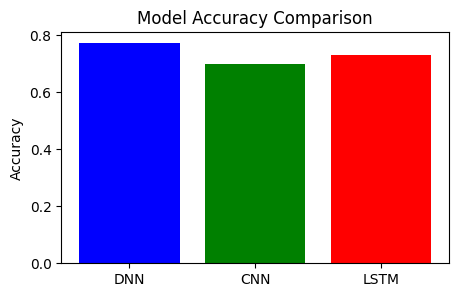

In [131]:
# 모델별 성능 비교 출력
print(f'DNN Accuracy: {DNN_accuracy:.4f}')
print(f'CNN Accuracy: {CNN_accuray:.4f}')
print(f'LSTM Accuracy: {LSTM_accuray:.4f}')

# 성능 비교 시각화
models = ['DNN', 'CNN', 'LSTM']
accuracies = [DNN_accuracy, CNN_accuray, LSTM_accuray]

plt.figure(figsize=(5, 3))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()